In [133]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import incense
from incense import ExperimentLoader
import pandas as pd
import pickle
import seaborn as sns
from sparse_model_from_model import graph_for_matrices
from vectorincrement import hardcoded_agent_reward
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

In [4]:
loader = ExperimentLoader(
    mongo_uri='mongodb://localhost/test', 
    db_name='test'
)

In [5]:
exp = loader.find_by_id(2)

In [6]:
loader.find_by_config_key('v_k', 3)

QuerySet([Experiment(id=27, name=sparse_causal_model_rl), Experiment(id=33, name=sparse_causal_model_rl), Experiment(id=34, name=sparse_causal_model_rl), Experiment(id=35, name=sparse_causal_model_rl), Experiment(id=43, name=sparse_causal_model_rl), Experiment(id=45, name=sparse_causal_model_rl), Experiment(id=57, name=sparse_causal_model_rl), Experiment(id=60, name=sparse_causal_model_rl), Experiment(id=61, name=sparse_causal_model_rl), Experiment(id=62, name=sparse_causal_model_rl), Experiment(id=69, name=sparse_causal_model_rl), Experiment(id=83, name=sparse_causal_model_rl), Experiment(id=84, name=sparse_causal_model_rl), Experiment(id=85, name=sparse_causal_model_rl), Experiment(id=86, name=sparse_causal_model_rl), Experiment(id=87, name=sparse_causal_model_rl), Experiment(id=88, name=sparse_causal_model_rl), Experiment(id=89, name=sparse_causal_model_rl), Experiment(id=90, name=sparse_causal_model_rl), Experiment(id=91, name=sparse_causal_model_rl), Experiment(id=92, name=sparse_

In [7]:
experiments = np.array(list(loader.find_all()))
experiments = np.array([exp for exp in experiments if exp.status == "COMPLETED"])
configs = [exp.config for exp in loader.find_all()]

In [8]:
configs = pd.DataFrame(configs)
configs = configs[np.vectorize(lambda x : x is not None)(configs.repetitions)]
configs

,__doc__,alpha,collect_episodes_per_iteration,curiosity_interval,d_init_randomness,do_transform,eps_dinv,eval_interval,fc_layer_params,learning_rate,...,num_iterations,p_ord,repetitions,replay_buffer_capacity,seed,time_limit,v_k,v_n,v_seed,w_max_dataset_size
0,All configuration.,1.0,20,10,5.0,True,1.000000,1,(),0.001,...,1000,1.0,NaN,1000,513165562,20,5,5,43,5000
1,All configuration.,1.0,20,10,5.0,True,1.000000,1,(),0.001,...,1000,1.0,NaN,1000,700472803,20,5,5,43,5000
2,All configuration.,1.0,20,10,10.0,True,4.641589,1,(),0.001,...,1000,0.7,5.0,1000,25629796,20,2,2,1,5000
3,All configuration.,1.0,20,10,10.0,True,100.000000,1,(),0.001,...,1000,0.8,7.0,1000,250036705,20,2,2,43,5000
4,All configuration.,1.0,20,10,0.5,True,0.077426,1,(),0.001,...,1000,0.2,3.0,1000,59471443,20,2,2,1,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,All configuration.,1.0,20,10,5.0,True,1.000000,1,(),0.001,...,1000,1.0,9.0,1000,214968468,20,10,10,5,5000
190,All configuration.,1.0,20,10,5.0,True,1.000000,1,(),0.001,...,1000,1.0,7.0,1000,375111865,20,10,10,1,5000
191,All configuration.,1.0,20,10,5.0,True,1.000000,1,(),0.001,...,1000,1.0,7.0,1000,11844655,20,10,10,5,5000
192,All configuration.,1.0,20,10,5.0,True,1.000000,1,(),0.001,...,1000,1.0,3.0,1000,567786664,20,10,10,5,5000


In [9]:
print("Changing")
changing_columns = [c for c in configs.columns if len(np.unique(configs[c])) > 1]
print(changing_columns)

Changing
['d_init_randomness', 'eps_dinv', 'p_ord', 'repetitions', 'seed', 'v_k', 'v_n', 'v_seed']


In [10]:
uniq_vals = {c: np.unique(configs[c]) for c in changing_columns}
uniq_vals

{'d_init_randomness': array([ 0.5  ,  2.875,  5.   ,  5.25 ,  7.625, 10.   ]),
 'eps_dinv': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
        5.99484250e-01, 1.00000000e+00, 1.66810054e+00, 4.64158883e+00,
        1.29154967e+01, 3.59381366e+01, 1.00000000e+02]),
 'p_ord': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'repetitions': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan, nan]),
 'seed': array([  1409051,   2211292,  11844655,  12062867,  22522466,  25629796,
         26936063,  29859480,  30362396,  32891135,  37298670,  39016921,
         40277978,  40455312,  59471443,  71246408,  92510697,  96905043,
         98379636, 117247315, 129008947, 130677856, 131563464, 132208955,
        141933159, 165813215, 168194867, 172801393, 177131401, 186094683,
        190446460, 199242568, 200201885, 202459618, 203900143, 204078688,
        213561195, 214968468, 215187509, 227294662, 231249911, 233407586,
        233472568, 23541344

# Selecting experiments

In [14]:
exps = experiments[configs[(configs.p_ord == 1.0) & (configs.v_n == 3)].index]

# Analyzing one experiment

In [15]:
exp = exps[0]

In [16]:
sml = pickle.loads(exp.artifacts['sml'].content)
W = pickle.loads(exp.artifacts['W'].content)

## Causal learner info

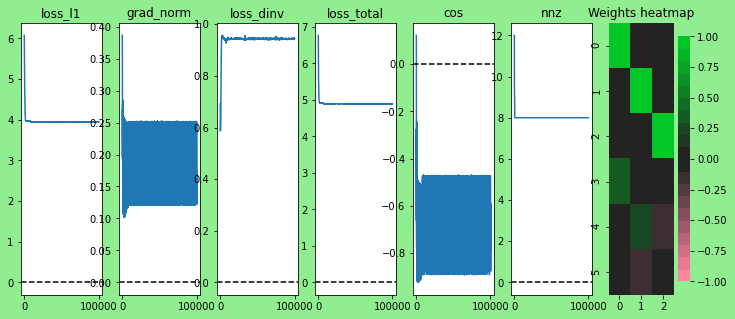

In [17]:
sml.process_results()

## Observation model loss

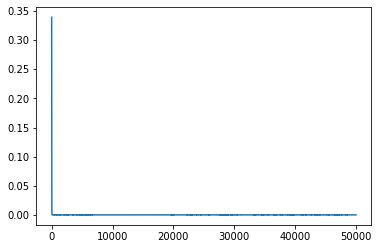

In [135]:
W.plot_loss()

# Final matrices

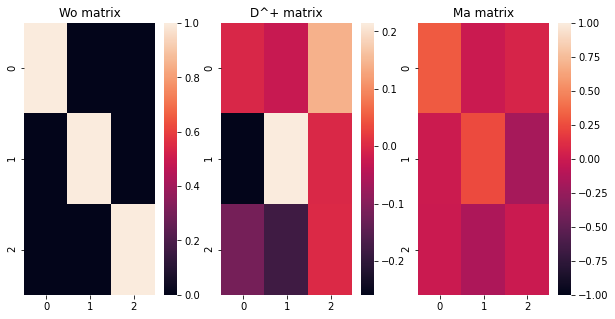

In [132]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Wo matrix")
sns.heatmap(W.get_Wo_Wa()[0])
plt.subplot(1, 3, 2)
plt.title("D^+ matrix")
sns.heatmap(np.linalg.pinv(sml.D.numpy()))
plt.subplot(1, 3, 3)
plt.title("Ma matrix")
sns.heatmap(sml.Ma, vmin=-1, vmax=1)

## Graphs for M, W

In [119]:
def select_threshold(M):
    """Select threshold for a matrix."""
    x = pd.DataFrame({'x': np.log(np.abs(M.flatten()))})
    kmeans = KMeans(n_clusters=2)
    kmeans.fit_transform(X=np.array(x.x).reshape((-1, 1)))
    x['label'] = kmeans.labels_
    clusters = np.argsort([np.min(df.x) for l, df in x.groupby('label')])
    l = np.max(x.x[x.label == clusters[0]])
    r = np.min(x.x[x.label == clusters[1]])
    assert l < r
    threshold = (l + r) / 2
    plt.title('Histogram of $|M_a|$ weights')
    plt.hist(x.x)
    plt.axvline(threshold, label='threshold')
    plt.legend()
    plt.show()
    return np.exp(threshold)

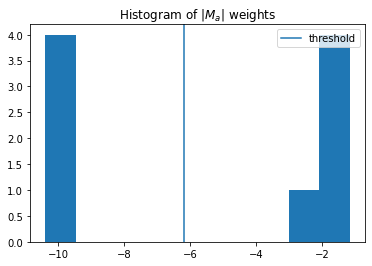

Number of edges: 8 out of 18, sparsity 55.56%


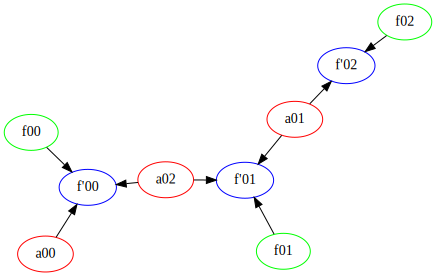

In [125]:
graph_M = graph_for_matrices(sml.Mf, sml.Ma, threshold=select_threshold(sml.Ma))
graph_M

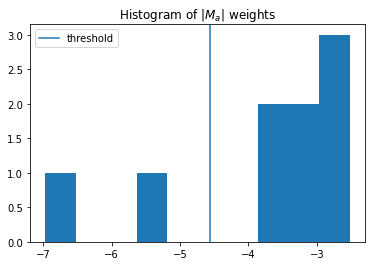

Number of edges: 10 out of 18, sparsity 44.44%


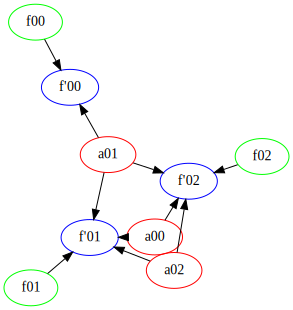

In [124]:
graph_W = graph_for_matrices(*W.get_Wo_Wa(), threshold=select_threshold(W.get_Wo_Wa()[1]))
graph_W

## Descent curve

In [127]:
sml.weights_descent_pca_space(maxL=100)

## Agent info

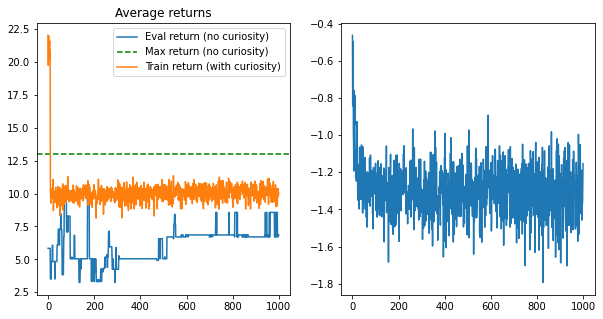

In [130]:
rew = hardcoded_agent_reward(exp.config["v_n"], exp.config["v_k"])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Average returns")
plt.plot(exp.metrics["agent.eval_return"], label="Eval return (no curiosity)")
plt.axhline(rew, ls="--", color="green", label="Max return (no curiosity)")
plt.plot(exp.metrics["agent.train_return"], label="Train return (with curiosity)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(exp.metrics["agent.train_loss"], label="Agent loss")

plt.show()